In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
true_sol=np.array([[0.],[1.]]) #True solution
epsilon=10**(-16) #Machine precision
err_newton=[] #Errors for newton method
err_broyden=[] #Errors for Broyden method

In [78]:
def f(x0): #RHS function
    x1=x0[0][0]
    x2=x0[1][0]
    rhs=np.array([[(x1+3.)*(x2**2-7.)+18],[np.sin(x2*np.exp(x1)-1.)]])
    return rhs

In [79]:
def Jacob(x0): #Jacobian function
    x1=x0[0][0]
    x2=x0[1][0]
    J=np.array([[(x2**2-7.),(x1+3.)*2*x2],[np.cos(x2*np.exp(x1)-1.)*x2*np.exp(x1), np.cos(x2*np.exp(x1)-1.)*np.exp(x1)]])
    return J

In [80]:
def Newton(): #Newton method
    iteration=0
    x0=np.array([[-0.5],[1.4]]) #Initial point
    while(np.linalg.norm(x0-true_sol)>epsilon):
        s0=np.linalg.solve(Jacob(x0),-f(x0))
        x0=s0+x0
        err_newton.append(np.linalg.norm(x0-true_sol))
        iteration+=1
    return iteration  

In [81]:
def Broyden(): #Newton method
    iteration=0
    x0=np.array([[-0.5],[1.4]]) #Initial point
    B0=Jacob(x0)
    while(np.linalg.norm(x0-true_sol)>epsilon):
        s0=np.linalg.solve(B0,-f(x0))
        x1=s0+x0
        y0=f(x1)-f(x0)
        B0=B0+ np.dot((y0-np.dot(B0,s0)),s0.T)/np.dot(s0.T,s0)
        x0=x1
        err_broyden.append(np.linalg.norm(x0-true_sol))
        iteration+=1
    return iteration
    

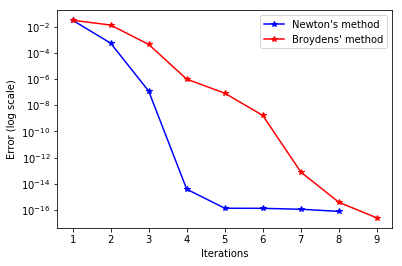

No. of iterations required for Newton to converge:  8
No. of iterations required for Broyden to converge:  9


In [82]:
i_Newton=Newton()
i_Broyden=Broyden()
plt.semilogy(list(range(1,i_Newton+1)),err_newton,'-*b',label='Newton\'s method')
plt.semilogy(list(range(1,i_Broyden+1)),err_broyden,'-*r',label='Broydens\' method')
plt.xlabel('Iterations')
plt.ylabel('Error (log scale)')
plt.title('Comparing Newton and Broyden methods')
plt.legend()
plt.show()
print ('No. of iterations required for Newton to converge: ',i_Newton)
print ('No. of iterations required for Broyden to converge: ', i_Broyden)